In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
modi_tweets_org = pd.read_json('C:/Users/Subhadri/Desktop/Data Science/Term 2/Unstructured Data Analysis/Text Analytics/Assignment 2/Narendra Modi Tweets.json')
modi_tweets_org.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
1,दिल्ली में 1700 से ज्यादा कॉलोनियों में रहने व...,hi,Twitter Media Studio,1580221574000,3813
2,दशकों पुरानी समस्याओं को सुलझा रही हमारी सरकार...,hi,Twitter Media Studio,1580221411000,3693
3,"स्वतंत्र भारत ने पाकिस्तान, बांग्लादेश और अफगा...",hi,Twitter Media Studio,1580221113000,6170
4,सालों तक नॉर्थ ईस्ट के साथ जिस तरह की नीति अपन...,hi,Twitter Media Studio,1580220984000,3060


In [3]:
modi_tweets_org.shape

(1000, 5)

In [4]:
print(modi_tweets_org['Lang'].nunique())
print(modi_tweets_org['Lang'].unique())

27
['en' 'hi' 'pt' 'ta' 'und' 'pa' 'in' 'bn' 'kn' 'iw' 'si' 'ja' 'ar' 'zh'
 'ru' 'vi' 'my' 'th' 'ml' 'es' 'gu' 'bo' 'ur' 'mr' 'et' 'tl' 'fr']


In [5]:
modi_tweets_org = modi_tweets_org[modi_tweets_org['Lang'] == 'en']
modi_tweets_org.head()

,Text,Lang,Source,Time,Retweets
0,Addressed the Global Potato Conclave at Gandhi...,en,Twitter for iPhone,1580222363000,2388
6,Delighted to be at the NCC Rally. Watch. https...,en,Periscope,1580196983000,4533
7,Addressing the Global Potato Conclave. https:/...,en,Periscope,1580189524000,3508
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,en,Twitter Web App,1580125842000,3341
10,Extremely touched by the lovely #RepublicDay w...,en,Twitter Web App,1580125780000,2591


In [6]:
modi_tweets = pd.DataFrame()
modi_tweets['Text'] = modi_tweets_org['Text']
modi_tweets.head()

,Text
0,Addressed the Global Potato Conclave at Gandhi...
6,Delighted to be at the NCC Rally. Watch. https...
7,Addressing the Global Potato Conclave. https:/...
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...
10,Extremely touched by the lovely #RepublicDay w...


In [7]:
modi_tweets.shape

(729, 1)

In [8]:
modi_tweets[modi_tweets.duplicated()]

,Text


In [9]:
combined_text = " ".join(modi_tweets['Text'].values)
combined_text

'Addressed the Global Potato Conclave at Gandhinagar via video-conferencing. \n\nShared how Indian farmers are taking… https://t.co/ZXhwJhW5hT Delighted to be at the NCC Rally. Watch. https://t.co/kg1oedPscd Addressing the Global Potato Conclave. https://t.co/GIuavRjLtA Excellent idea @AmanKayamHai_ET! \n\nYou may call this a "small change” but such small acts will have a huge impact i… https://t.co/46MSARhwRO Extremely touched by the lovely #RepublicDay wishes @PMBhutan!\n\nYou have wonderfully highlighted the unbreakable bo… https://t.co/9RZBawTKS3 The Accord with Bodo groups will further protect and popularise the unique culture of the Bodo people. \n\nThey will… https://t.co/1mFoTMESK9 Bodo Accord inked today stands out for many reasons. \n\nIt successfully brings together the leading stakeholders und… https://t.co/F9WpV5ggMf Ushering in a new dawn of peace, harmony and togetherness!\n\nToday is a very special day for India. \n\nThe Accord wit… https://t.co/FGzHeEBV7N Thank you for

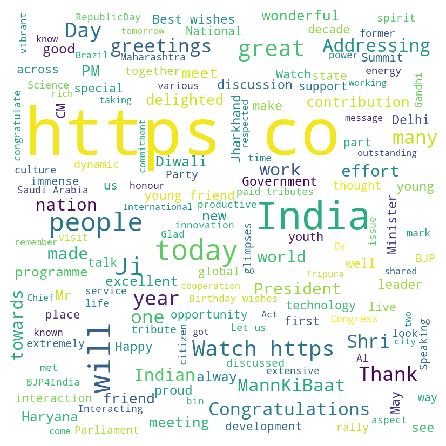

In [10]:
from wordcloud import WordCloud
word_cloud = WordCloud(width = 800, height = 800, background_color = 'white', max_words = 150).generate(combined_text)
plt.figure(figsize = (12,6))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [11]:
words_list = []
for i in combined_text.split():
    words_list.append(i)
word_count = {}
for j in words_list:
    word_count[j] = word_count.get(j,0) + 1
word_count_series = pd.Series(word_count)
word_count_df = pd.DataFrame(word_count_series)
word_count_df = word_count_df.reset_index().rename(columns = {'index':'Words', 0:'Frequency'})
word_count_df.head()

,Words,Frequency
0,Addressed,1
1,the,579
2,Global,4
3,Potato,2
4,Conclave,1


In [12]:
top_25_words = word_count_df.sort_values(ascending = False, by = 'Frequency')
top_25_words.head(25)

,Words,Frequency
1,the,579
69,of,391
17,to,374
65,and,286
90,in,215
33,a,203
97,is,141
209,on,133
78,for,130
134,I,130


## Data Cleaning

In [13]:
import nltk
from nltk.tokenize import word_tokenize

In [14]:
all_words = word_tokenize(combined_text.lower())
print(all_words)

['addressed', 'the', 'global', 'potato', 'conclave', 'at', 'gandhinagar', 'via', 'video-conferencing', '.', 'shared', 'how', 'indian', 'farmers', 'are', 'taking…', 'https', ':', '//t.co/zxhwjhw5ht', 'delighted', 'to', 'be', 'at', 'the', 'ncc', 'rally', '.', 'watch', '.', 'https', ':', '//t.co/kg1oedpscd', 'addressing', 'the', 'global', 'potato', 'conclave', '.', 'https', ':', '//t.co/giuavrjlta', 'excellent', 'idea', '@', 'amankayamhai_et', '!', 'you', 'may', 'call', 'this', 'a', '``', 'small', 'change', '”', 'but', 'such', 'small', 'acts', 'will', 'have', 'a', 'huge', 'impact', 'i…', 'https', ':', '//t.co/46msarhwro', 'extremely', 'touched', 'by', 'the', 'lovely', '#', 'republicday', 'wishes', '@', 'pmbhutan', '!', 'you', 'have', 'wonderfully', 'highlighted', 'the', 'unbreakable', 'bo…', 'https', ':', '//t.co/9rzbawtks3', 'the', 'accord', 'with', 'bodo', 'groups', 'will', 'further', 'protect', 'and', 'popularise', 'the', 'unique', 'culture', 'of', 'the', 'bodo', 'people', '.', 'they',

In [15]:
from nltk.probability import FreqDist
fdist = FreqDist(all_words)
fdist

FreqDist({':': 737, '.': 715, 'https': 714, 'the': 657, 'of': 392, 'to': 377, ',': 356, 'and': 289, 'in': 238, 'a': 231, ...})

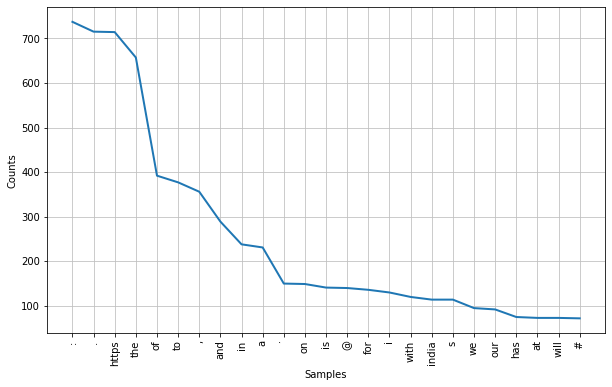

In [16]:
plt.figure(figsize = (10,6))
fdist.plot(25, cumulative = False)
plt.show()

In [17]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
from string import punctuation
stop_words_updated = stop_words + ['..', '...', 'will', 'would', 'can', 'could', 'should', "n't"]
updated_text = [word for word in all_words if word not in stop_words_updated\
               and word not in list(punctuation) and len(word) > 2]
print(updated_text)

['addressed', 'global', 'potato', 'conclave', 'gandhinagar', 'via', 'video-conferencing', 'shared', 'indian', 'farmers', 'taking…', 'https', '//t.co/zxhwjhw5ht', 'delighted', 'ncc', 'rally', 'watch', 'https', '//t.co/kg1oedpscd', 'addressing', 'global', 'potato', 'conclave', 'https', '//t.co/giuavrjlta', 'excellent', 'idea', 'amankayamhai_et', 'may', 'call', 'small', 'change', 'small', 'acts', 'huge', 'impact', 'https', '//t.co/46msarhwro', 'extremely', 'touched', 'lovely', 'republicday', 'wishes', 'pmbhutan', 'wonderfully', 'highlighted', 'unbreakable', 'bo…', 'https', '//t.co/9rzbawtks3', 'accord', 'bodo', 'groups', 'protect', 'popularise', 'unique', 'culture', 'bodo', 'people', 'will…', 'https', '//t.co/1mfotmesk9', 'bodo', 'accord', 'inked', 'today', 'stands', 'many', 'reasons', 'successfully', 'brings', 'together', 'leading', 'stakeholders', 'und…', 'https', '//t.co/f9wpv5ggmf', 'ushering', 'new', 'dawn', 'peace', 'harmony', 'togetherness', 'today', 'special', 'day', 'india', 'acc

In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer_words = [lemmatizer.lemmatize(i) for i in updated_text]
print(len(set(lemmatizer_words)))

3546


## 1. Clean the tweets

In [20]:
def clean_text(text):
    token = word_tokenize(text.lower())
    lemm = [lemmatizer.lemmatize(i) for i in token if i not in stop_words_updated\
           and i not in list(punctuation) and len(i) > 2]
    sentence = " ".join(lemm)
    return sentence.replace('http','').replace('co','')

modi_tweets['Cleaned Text'] = modi_tweets['Text'].apply(clean_text)
modi_tweets.head()

,Text,Cleaned Text
0,Addressed the Global Potato Conclave at Gandhi...,addressed global potato nclave gandhinagar via...
6,Delighted to be at the NCC Rally. Watch. https...,delighted ncc rally watch //t./kg1oedpscd
7,Addressing the Global Potato Conclave. https:/...,addressing global potato nclave //t./giuavrjlta
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,excellent idea amankayamhai_et may call small ...
10,Extremely touched by the lovely #RepublicDay w...,extremely touched lovely republicday wish pmbh...


In [21]:
stop_words_updated = set(stop_words_updated) - {'no', 'nor', 'not'}
print(stop_words_updated)

{'they', 'then', 'having', 'do', 'very', 'couldn', 'have', 'yourself', "hadn't", 'd', 'if', 'was', 'it', 'ours', '..', '...', "you've", 'my', 'those', 'why', 'them', 'off', 'just', 'don', 'aren', 'mightn', 'has', 'under', 'more', 'its', 'here', 'yours', 'in', 'below', 'any', 'by', 'that', 'further', 're', 'your', 'which', 'me', 'as', 'when', "mightn't", "wouldn't", 'up', 'she', 'all', 'now', 'our', 'down', "couldn't", 'how', 'shouldn', 'should', 'themselves', 'is', 'does', 'their', 'whom', 'and', "haven't", 'being', 'he', 'into', 'where', 've', 'y', 'hers', 'but', 'with', 'before', 'until', "aren't", 'on', "needn't", 'won', 'doing', 'you', 'than', "she's", 'same', 'most', 't', 'would', "n't", 'had', "don't", "mustn't", 'of', "you're", 'o', 'shan', 'him', 'will', 'm', 'weren', 'other', 'wasn', 'some', 'from', 'himself', 'once', 'so', 'can', 'own', "isn't", 'who', 'ma', 'these', "didn't", 'mustn', 'a', 'the', 'his', 'yourselves', 'above', 'haven', "you'll", 'against', 'herself', 'll', 'n

## 2. Create the DTM using CountVectorizer; Set min_df = 5.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df = 5)
unigram = count_vect.fit_transform(modi_tweets['Cleaned Text'])
print(count_vect.get_feature_names())

['130', '150', '2019', '2020', 'across', 'act', 'addressing', 'affection', 'air', 'already', 'also', 'always', 'among', 'and', 'anguished', 'arabia', 'aspect', 'aspiration', 'atal', 'attended', 'away', 'bal', 'bangkok', 'bapu', 'beme', 'best', 'better', 'bharat', 'bilateral', 'bin', 'birthday', 'bjp', 'bjp4india', 'blessed', 'blessing', 'boosting', 'bow', 'brave', 'brazil', 'brics', 'brother', 'business', 'called', 'chancellor', 'charcha', 'chief', 'citizen', 'city', 'cleanliness', 'crore', 'culture', 'day', 'decade', 'decision', 'delhi', 'delight', 'delighted', 'dev', 'development', 'discussed', 'discussion', 'diwali', 'dr', 'dream', 'duty', 'dynamic', 'earlier', 'effort', 'election', 'energy', 'ensuring', 'environment', 'ethos', 'even', 'every', 'everyone', 'excellent', 'extensive', 'extremely', 'family', 'festival', 'first', 'five', 'for', 'force', 'former', 'forward', 'friend', 'friendship', 'fruitful', 'full', 'furthering', 'gandhi', 'give', 'glad', 'glimpse', 'global', 'good', 'g

In [23]:
DTM = pd.DataFrame(unigram.toarray(), columns = count_vect.get_feature_names())
DTM.head()

,130,150,2019,2020,across,act,addressing,affection,air,already,...,wonderful,work,worked,working,world,year,yesterday,young,youngster,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
top_unigrams = DTM.sum().sort_values(ascending = False)
top_unigrams = top_unigrams.reset_index()
top_unigrams.rename(columns = {'index':'Words', 0:'Frequency'}, inplace = True)
top_unigrams.head(10)

,Words,Frequency
0,india,128
1,today,67
2,watch,53
3,people,51
4,year,39
5,great,39
6,young,37
7,day,35
8,greeting,33
9,president,31


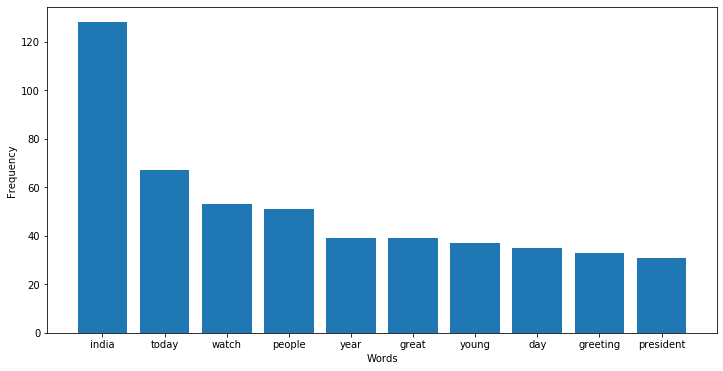

In [25]:
plt.figure(figsize = (12,6))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.bar(top_unigrams['Words'].head(10), top_unigrams['Frequency'].head(10))
plt.show()

## 3. Using KMeans algorithm, cluster the tweets in to 4 groups.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features = 150)

In [27]:
from sklearn.cluster import KMeans
no_of_clusters = 4
km = KMeans(n_clusters = no_of_clusters, random_state = 0)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

## 4. Get the:
- Top 5 hashtags in each group.
- Top 5 words in each group.

## 5. Create word cloud for each group.

### Top 5 hashtags in each group

In [28]:
from nltk.tokenize import regexp_tokenize

In [29]:
def hashtag_text(text):
    token = regexp_tokenize(text.lower(), pattern = '#[\w]+')
    lemm = [lemmatizer.lemmatize(i) for i in token if i not in stop_words_updated\
           and i not in list(punctuation) and len(i) > 2]
    sentence = " ".join(lemm)
    return sentence.replace('http','').replace('co','')

modi_tweets['Hashtag Text'] = modi_tweets['Text'].apply(hashtag_text)
modi_tweets.head()

,Text,Cleaned Text,Hashtag Text
0,Addressed the Global Potato Conclave at Gandhi...,addressed global potato nclave gandhinagar via...,
6,Delighted to be at the NCC Rally. Watch. https...,delighted ncc rally watch //t./kg1oedpscd,
7,Addressing the Global Potato Conclave. https:/...,addressing global potato nclave //t./giuavrjlta,
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,excellent idea amankayamhai_et may call small ...,
10,Extremely touched by the lovely #RepublicDay w...,extremely touched lovely republicday wish pmbh...,#republicday


In [30]:
X = tfidf_vect.fit_transform(modi_tweets['Hashtag Text'])

In [31]:
pred_cluster1 = km.fit_predict(X)
modi_tweets['Hashtags Cluster'] = pred_cluster1
modi_tweets['Hashtags Cluster'].value_counts()

1    692
3     23
2      8
0      6
Name: Hashtags Cluster, dtype: int64

In [32]:
km.cluster_centers_.shape

(4, 25)

In [33]:
print('Top 5 hashtags in each group: ')
order_centroids = km.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vect.get_feature_names()
for i in range(no_of_clusters):
    print('Cluster', i, ':')
    for j in order_centroids[i,:5]:
        print(' ', terms[j])

Top 5 hashtags in each group: 
Cluster 0 :
  diwali
  mannkibaat
  thukmat
  htls2019
  asean2019
Cluster 1 :
  gandhi150
  htls2019
  nstitutionday
  gandhijayanti
  singaporeindiahackathon
Cluster 2 :
  republicday
  thukmat
  htls2019
  asean2019
  bharatkilaxmi
Cluster 3 :
  mannkibaat
  thukmat
  htls2019
  asean2019
  bharatkilaxmi


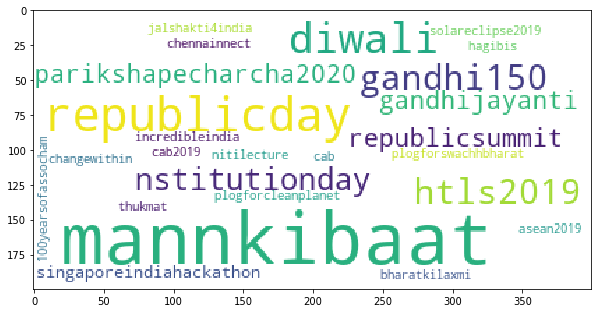

In [34]:
cluster0 = modi_tweets[modi_tweets['Hashtags Cluster'] == 0]
text0 = ' '.join(modi_tweets['Hashtag Text'])
plt.figure(figsize = (10,6))
wc0 = WordCloud(background_color = 'white').generate(text0)
plt.imshow(wc0)

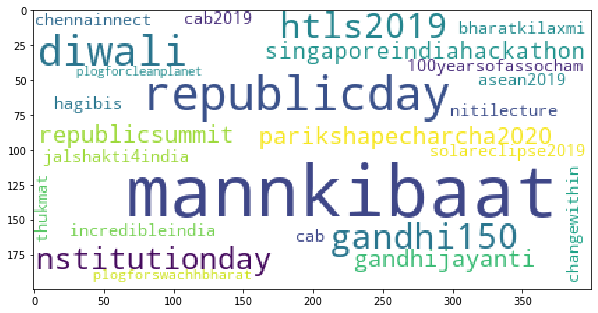

In [35]:
cluster1 = modi_tweets[modi_tweets['Hashtags Cluster'] == 1]
text1 = ' '.join(modi_tweets['Hashtag Text'])
plt.figure(figsize = (10,6))
wc1 = WordCloud(background_color = 'white').generate(text1)
plt.imshow(wc1)

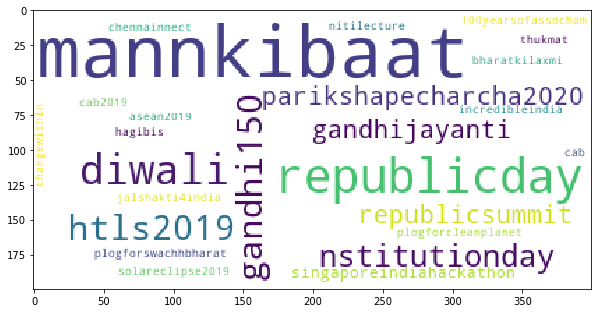

In [36]:
cluster2 = modi_tweets[modi_tweets['Hashtags Cluster'] == 2]
text2 = ' '.join(modi_tweets['Hashtag Text'])
plt.figure(figsize = (10,6))
wc2 = WordCloud(background_color = 'white').generate(text2)
plt.imshow(wc2)

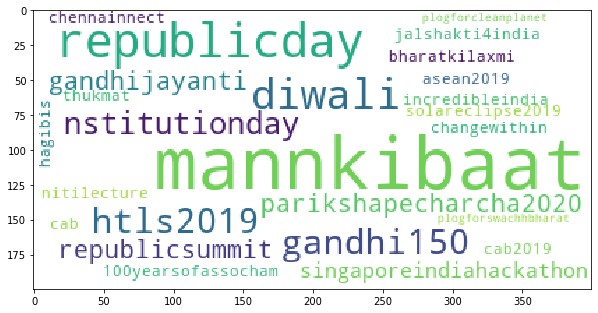

In [37]:
cluster3 = modi_tweets[modi_tweets['Hashtags Cluster'] == 3]
text3 = ' '.join(modi_tweets['Hashtag Text'])
plt.figure(figsize = (10,6))
wc3 = WordCloud(background_color = 'white').generate(text3)
plt.imshow(wc3)

### Top 5 words in each group

In [38]:
Y = tfidf_vect.fit_transform(modi_tweets['Cleaned Text'])

In [39]:
pred_cluster2 = km.fit_predict(Y)
modi_tweets['Words Cluster'] = pred_cluster2
modi_tweets['Words Cluster'].value_counts()

0    520
3    109
2     51
1     49
Name: Words Cluster, dtype: int64

In [40]:
km.cluster_centers_.shape

(4, 150)

In [41]:
print('Top 5 words in each group: ')
order_centroids = km.cluster_centers_.argsort()[:,::-1]
terms = tfidf_vect.get_feature_names()
for i in range(no_of_clusters):
    print('Cluster', i, ':')
    for j in order_centroids[i,:5]:
        print(' ', terms[j])

Top 5 words in each group: 
Cluster 0 :
  today
  great
  young
  greeting
  also
Cluster 1 :
  people
  thank
  year
  today
  government
Cluster 2 :
  watch
  addressing
  speaking
  rally
  bjp
Cluster 3 :
  india
  always
  indian
  proud
  thank


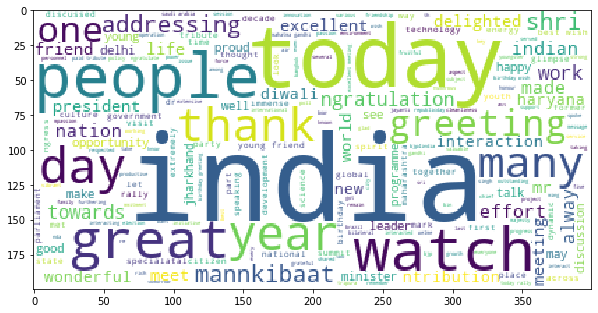

In [42]:
cluster0 = modi_tweets[modi_tweets['Words Cluster'] == 0]
text0 = ' '.join(modi_tweets['Cleaned Text'])
plt.figure(figsize = (10,6))
wc0 = WordCloud(background_color = 'white').generate(text0)
plt.imshow(wc0)

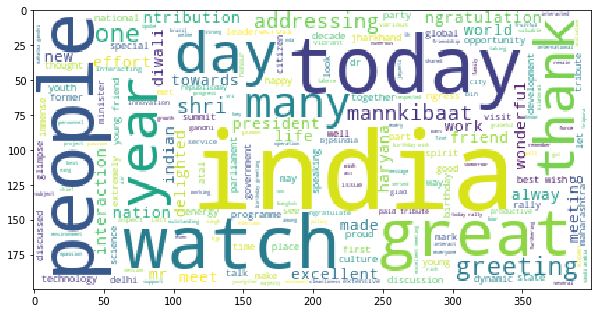

In [43]:
cluster1 = modi_tweets[modi_tweets['Words Cluster'] == 1]
text1 = ' '.join(modi_tweets['Cleaned Text'])
plt.figure(figsize = (10,6))
wc1 = WordCloud(background_color = 'white').generate(text1)
plt.imshow(wc1)

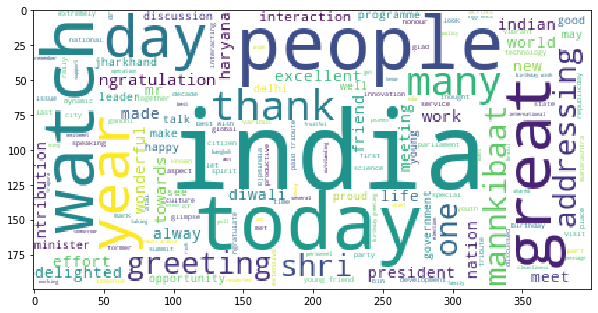

In [44]:
cluster2 = modi_tweets[modi_tweets['Words Cluster'] == 2]
text2 = ' '.join(modi_tweets['Cleaned Text'])
plt.figure(figsize = (10,6))
wc2 = WordCloud(background_color = 'white').generate(text2)
plt.imshow(wc2)

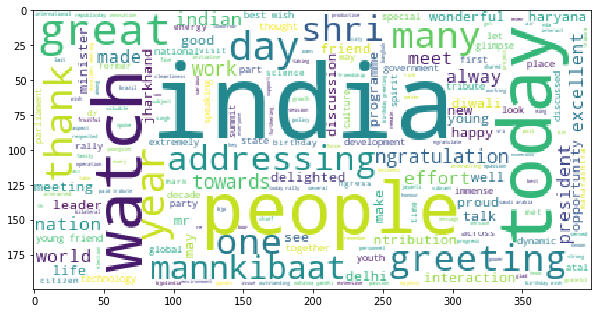

In [45]:
cluster3 = modi_tweets[modi_tweets['Words Cluster'] == 3]
text3 = ' '.join(modi_tweets['Cleaned Text'])
plt.figure(figsize = (10,6))
wc3 = WordCloud(background_color = 'white').generate(text3)
plt.imshow(wc3)

In [46]:
modi_tweets.head()

,Text,Cleaned Text,Hashtag Text,Hashtags Cluster,Words Cluster
0,Addressed the Global Potato Conclave at Gandhi...,addressed global potato nclave gandhinagar via...,,1,0
6,Delighted to be at the NCC Rally. Watch. https...,delighted ncc rally watch //t./kg1oedpscd,,1,2
7,Addressing the Global Potato Conclave. https:/...,addressing global potato nclave //t./giuavrjlta,,1,0
9,Excellent idea @AmanKayamHai_ET! \n\nYou may c...,excellent idea amankayamhai_et may call small ...,,1,0
10,Extremely touched by the lovely #RepublicDay w...,extremely touched lovely republicday wish pmbh...,#republicday,2,0
